# The Mandelbrot Set in Python

<img src="https://github.com/natsunoyuki/blog_posts/blob/main/images/mandelbrot_1.png?raw=True" alt="drawing" width="333"/>

Many people might have seen this image somewhere else before, perhaps with more colours. A lot more colours. Call me old fashioned, but personally I think it looks best in black and white. We call it the <a href="https://en.wikipedia.org/wiki/Mandelbrot_set" target="_blank">Mandelbrot set</a>, after famous the mathematician who visualised it, <a href="https://en.wikipedia.org/wiki/Benoit_Mandelbrot" target="_blank">Benoit Mandelbrot</a>.

The Mandelbrot set is a <a href="https://en.wikipedia.org/wiki/Fractal" target="_blank">fractal</a>, an object in Euclidean space which is self similar and whose fractal dimension exceeds its <a href="https://en.wikipedia.org/wiki/Lebesgue_covering_dimension" target="_blank">topological dimension</a>. Well that probably did not make a lot of sense. Simply put, that means it you "zoom into" minuscule parts of the fractal, you will see the same features re-appearing at different scales, again and again and again and again and... you get the point I hope. If not, I will show you what this means towards the end of this post! In this post, I will show you how to make your own Mandelbrot set in Python!

The entire Python code itself is not particularly long, so here it is.    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot_set(num_iter = 50, N = 1000, X0 = np.array([-2, 2, -2, 2])):
    """
    Generates the Mandelbrot set fractal
    
    Inputs
    ------
    num_iter: int
        number of iterations to run
    N: int
        number of grid points on each axis to use. We use a square grid
    X0: np.array
        bounding box of the square grid to use
    
    Returns
    -------
    x: np.array
        x axis vlaues
    y: np.array
        y axis values
    F: np.array
        2D np.array containing the fractal
    """    
    x0 = X0[0]
    x1 = X0[1]
    y0 = X0[2]
    y1 = X0[3]
    i = 1j
    
    # Set up the complex grid.
    x, y = np.meshgrid(np.linspace(x0, x1, N), np.linspace(y0, y1, N) * i)
    z = x + y
    c = x + y
    Q = np.zeros([N, N])
    
    # Generate the fractal iteratively.
    for j in range(num_iter):
        z = z ** 2 + c 
        # Check which grid points blow up to infinity.
        index = np.abs(z) < np.inf
        Q[index] = Q[index] + 1
        
        # Generate the fractal iteratively using this relation.

    return np.linspace(x0, x1, N), np.linspace(y0, y1, N), Q

The code itself is fully contained within the function mandelbrot which requires the arguments: num_iter which is the number of iterations to run the code, N which is the grid size, X0 which is a list containing the grid boundaries, and fractal which tells the code which fractal to generate. You see, this code also allows you to generate the Julia set as well if you tell it to, so you are getting two fractals for the price of one!

First we need to setup the grid used to generate the fractal. Not any grid will do, and we specifically need to use a two dimensional grid of <a href="https://en.wikipedia.org/wiki/Complex_number" target="_blank">complex numbers</a>, which is generated using `[x, y] = np.meshgrid(X, Y * 1j)`. If you do not know what <a href="https://en.wikipedia.org/wiki/Complex_number" target="_blank">complex numbers</a> are, they are essentially numbers with the form: `r  = a + bi`, where `i = √-1` is the imaginary unit. For example, a complex number looks like this: `2 + 3i`. In the code below, each point in the complex grids c and z has a complex number of the form: `r = a + bi`. Therefore, the x-axis is the real axis, while the y-axis is the imaginary axis. Note that in Python, `i` is written as `1j` (yes, the 1 is mandatory).

After setting up the complex grid, we then move on to the fun part, generating the fractal itself! The fractal is generated though multiple iterations of a particular map. For example, the Mandelbrot set is generated through the map: `z = z ** 2 + c`. This means that every iteration, we take the values originally in the complex grid `z`, square them, and add the values from the second complex grid `c`. Doing this again and again will make the values at certain grid points go off to infinity, while other grid points will converge to a non-infinite value.

Therefore, we check if any of the values in the grid `z` have gone off to infinity, and keep track of the grid points that do not in each iteration using `index = np.abs(z) < np.inf`. We also keep track of how many iterations are required to make each grid point go off to infinity `Q[index] = Q[index] + 1`. Therefore, grid points in `z` which goes off to infinity very quickly will have relatively small corresponding values in `Q`, while grid points that do not go off to infinity will have a relatively large corresponding value in `Q`.

The visualisation of the Mandelbrot set is itself contained within `Q` and not `z`. Using `Q`, we can visualise the set of complex numbers on the complex grid `z` that do not explode to infinity after many iterations. Regions which do not go off to infinity will have a large value in `Q` and hence appear dark in the visualisation, while regions which do go off to infinity will have a small value in `Q` and hence appear light in the visualisation.

Running the function with the arguments: `x, y, F = mandelbrot_set(X0 = [-2, 1, -1.5, 1.5])` will result in the picture you saw at the top of this post. 

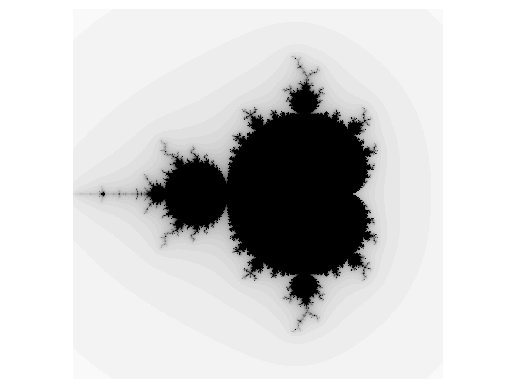

In [2]:
import warnings
warnings.filterwarnings("ignore")

x, y, F = mandelbrot_set(X0 = [-2, 1, -1.5, 1.5])

plt.pcolormesh(x, y, F, cmap = 'binary')
plt.axis('equal')
plt.axis('off')
plt.show()

Now, if you remember the part of about fractals being self similar, what if you changed the grid boundaries and zoomed in to the tiny area `[-1.8, -1.725, -0.03, 0.03]`? It turns out that within that tiny area exists a tiny copy of the original Mandelbrot set! This is what self similar means!

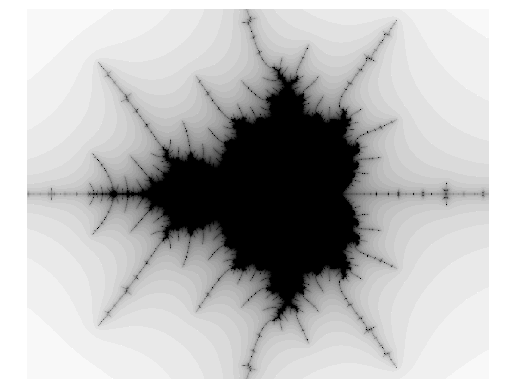

In [3]:
x, y, F = mandelbrot_set(X0 = [-1.8, -1.725, -0.03, 0.03])

plt.pcolormesh(x, y, F, cmap = 'binary')
plt.axis('equal')
plt.axis('off')
plt.show()

I hope you learnt something new today after reading this post! If you want to learn more about fractals, I strongly recommend Mandelbrot's book: <a href="https://www.amazon.com/gp/product/0716711869/ref=dbs_a_def_rwt_bibl_vppi_i4" target="_blank">The Fractal Geometry of Nature</a> which goes into deep detail about how fractals occur naturally in the world.

***
More Python codes for generating other fractals can be found in my Github repository: https://github.com/natsunoyuki/Fractals